# Data preparation time series exercise

In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

Objective: The end result of this exercise should be a file named prepare.py.

Using your store items data:

In [2]:
total_sales = pd.read_csv(r'/Users/hector/Documents/cached_csvs/total_sales.csv')
total_sales.shape

(913000, 17)

In [3]:
total_sales.head(2)

,Unnamed: 0,item,sale_amount,sale_date,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [4]:
total_sales.isnull().sum()

Unnamed: 0       0
item             0
sale_amount      0
sale_date        0
sale_id          0
store            0
store_address    0
store_city       0
store_id         0
store_state      0
store_zipcode    0
item_brand       0
item_id          0
item_name        0
item_price       0
item_upc12       0
item_upc14       0
dtype: int64

In [5]:
#unique list of stores (10 stores)
total_sales.store_id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [6]:
#unique list of items (50 items)
total_sales.item_id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [7]:
#number of unique items sold per day
total_sales.sale_date.nunique()

1826

In [8]:
#min and max sales per day
total_sales.sale_date.min(), total_sales.sale_date.max()

('Fri, 01 Apr 2016 00:00:00 GMT', 'Wed, 31 May 2017 00:00:00 GMT')

In [9]:
#sales amount range
total_sales.sale_amount.describe()

count    913000.000000
mean         52.250287
std          28.801144
min           0.000000
25%          30.000000
50%          47.000000
75%          70.000000
max         231.000000
Name: sale_amount, dtype: float64

1. Convert date column to datetime format.

In [10]:
# Reassign the sale_date column to be a datetime type
total_sales.sale_date = pd.to_datetime(total_sales.sale_date.apply(lambda x: x[:-13]))

In [15]:
total_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Unnamed: 0     913000 non-null  int64         
 1   item           913000 non-null  int64         
 2   sale_amount    913000 non-null  float64       
 3   sale_date      913000 non-null  datetime64[ns]
 4   sale_id        913000 non-null  int64         
 5   store          913000 non-null  int64         
 6   store_address  913000 non-null  object        
 7   store_city     913000 non-null  object        
 8   store_id       913000 non-null  int64         
 9   store_state    913000 non-null  object        
 10  store_zipcode  913000 non-null  int64         
 11  item_brand     913000 non-null  object        
 12  item_id        913000 non-null  int64         
 13  item_name      913000 non-null  object        
 14  item_price     913000 non-null  float64       
 15  

In [16]:
total_sales.head(1)

,Unnamed: 0,item,sale_amount,sale_date,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,0,1,13.0,2013-01-01,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [17]:
total_sales = total_sales.drop(['Unnamed: 0', 'item', 'store'], axis=1)

In [18]:
total_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   sale_amount    913000 non-null  float64       
 1   sale_date      913000 non-null  datetime64[ns]
 2   sale_id        913000 non-null  int64         
 3   store_address  913000 non-null  object        
 4   store_city     913000 non-null  object        
 5   store_id       913000 non-null  int64         
 6   store_state    913000 non-null  object        
 7   store_zipcode  913000 non-null  int64         
 8   item_brand     913000 non-null  object        
 9   item_id        913000 non-null  int64         
 10  item_name      913000 non-null  object        
 11  item_price     913000 non-null  float64       
 12  item_upc12     913000 non-null  int64         
 13  item_upc14     913000 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(5

2. Plot the distribution of sale_amount and item_price.

array([[<AxesSubplot:title={'center':'sale_amount'}>,
        <AxesSubplot:title={'center':'item_price'}>]], dtype=object)

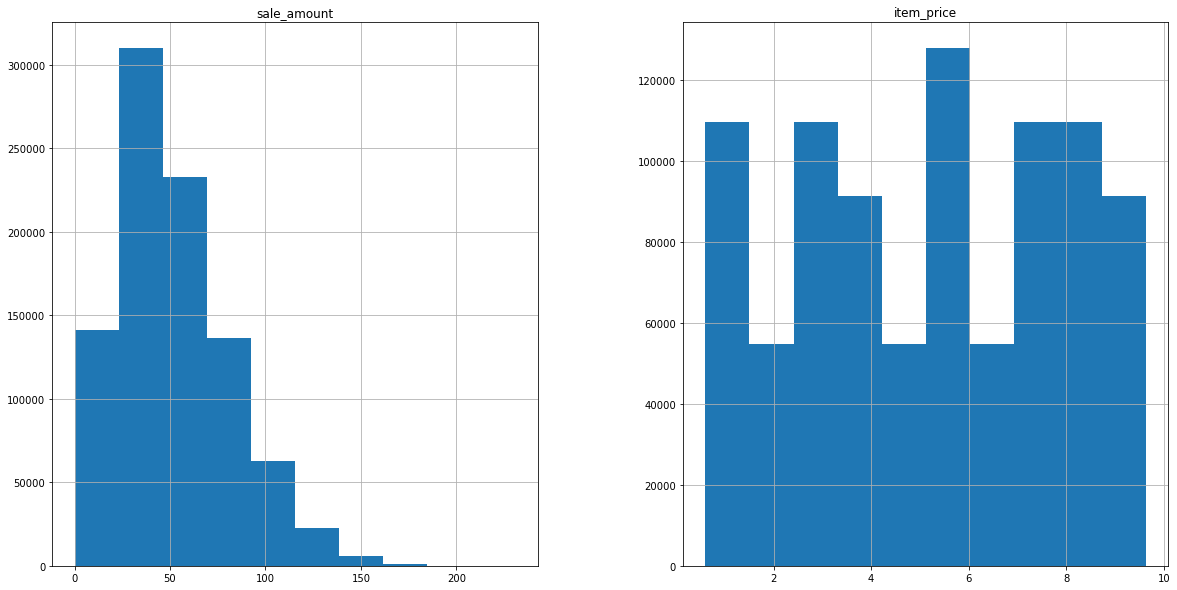

In [19]:
total_sales[['sale_amount', 'item_price']].hist(figsize=(20,10))

3. Set the index to be the datetime variable.

In [20]:
df = total_sales.set_index('sale_date').sort_index()

In [21]:
df.head(1)

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,
2013-01-01,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


4. Add a 'month' and 'day of week' column to your dataframe.

In [22]:
df['month'] = df.index.month_name()

In [23]:
df['weekday'] = df.index.day_name()

In [24]:
df.head(1)

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,weekday
sale_date,,,,,,,,,,,,,,,
2013-01-01,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Tuesday


5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [25]:
df['sales_total'] = df['sale_amount'] * df['item_price']

In [26]:
df.head(1)

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,weekday,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Tuesday,10.92


6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [27]:
def get_sales_data(r'/Users/hector/Documents/cached_csvs/total_sales.csv'):
    total_sales = pd.read_csv(url)
    total_sales.sale_date = pd.to_datetime(total_sales.sale_date.apply(lambda x: x[:-13]))
    total_sales = total_sales.drop(['Unnamed: 0', 'item', 'store'], axis=1)
    total_sales.set_index('sale_date').sort_index()
    return df

In [28]:
df = get_sales_data()
df.head(1)

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,weekday,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Tuesday,10.92


In [29]:
def add_columns(df):
    df['month'] = df.index.month_name()
    df['weekday'] = df.index.day_name()
    df['sales_total'] = df['sale_amount'] * df['item_price']
    return df

In [31]:
add_columns(df)
df.head()

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,weekday,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Tuesday,10.92
2013-01-01,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,218.40
2013-01-01,27.0,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,January,Tuesday,125.55
2013-01-01,54.0,213643,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,453.60
2013-01-01,35.0,215469,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,294.00


In [52]:
#df.to_csv(r'/Users/hector/Documents/cached_csvs/total_sales_data.csv')

### Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

In [32]:
opsd = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')
opsd.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [33]:
opsd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [34]:
opsd.isnull().sum()

Date              0
Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
dtype: int64

1. Convert date column to datetime format.

In [36]:
opsd['Date'] = pd.to_datetime(opsd.Date)

2. Plot the distribution of each of your variables.

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Consumption'}>],
       [<AxesSubplot:title={'center':'Wind'}>,
        <AxesSubplot:title={'center':'Solar'}>],
       [<AxesSubplot:title={'center':'Wind+Solar'}>, <AxesSubplot:>]],
      dtype=object)

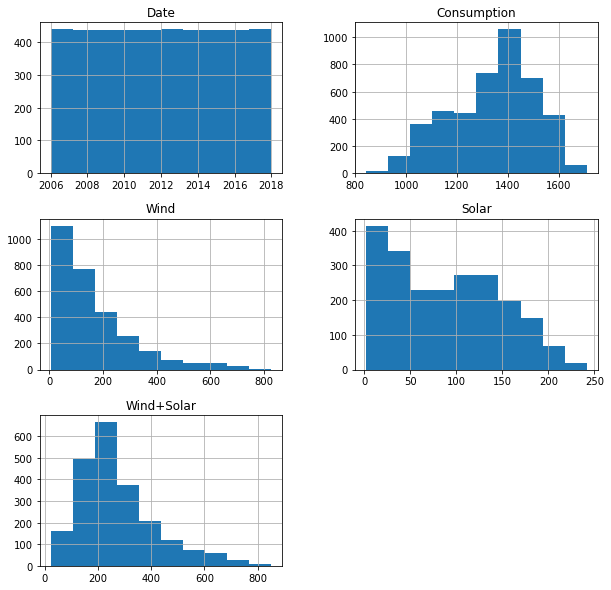

In [42]:
opsd.hist(figsize=(10,10))

3. Set the index to be the datetime variable.

In [44]:
opsd = opsd.set_index('Date').sort_index()

4. Add a month and a year column to your dataframe.

In [47]:
opsd['month'] = opsd.index.month_name()
opsd['year'] = opsd.index.year

In [48]:
opsd.head(0)

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,


5. Fill any missing values.

In [49]:
opsd.fillna(0, inplace=True)

In [51]:
opsd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         4383 non-null   float64
 2   Solar        4383 non-null   float64
 3   Wind+Solar   4383 non-null   float64
 4   month        4383 non-null   object 
 5   year         4383 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 239.7+ KB


6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [53]:
opsd.to_csv(r'/Users/hector/Documents/cached_csvs/opsd.csv')